# Homework 4 Solutions

In [41]:
import csv
import matplotlib.pyplot as plt

## Problem 1 (scatterplot)

In [44]:
# Read data from .csv file:
x = []
y = []
with open('scatter_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile , delimiter=',', quotechar= '|')
    for row in csvreader:
        # Only read rows that do NOT start with the "%" character.
        if (row[0][0] != '%'):
            x.append(float(row[0]))
            y.append(float(row[1]))

In [45]:
# Find the left and right-most points
extremex = [float('inf'), float('-inf')]
extremey = [0, 0]
for i in range(0, len(x)):
    if (x[i] < extremex[0]):
        extremex[0] = x[i]
        extremey[0] = y[i]
    elif (x[i] > extremex[1]):
        extremex[1] = x[i]
        extremey[1] = y[i]

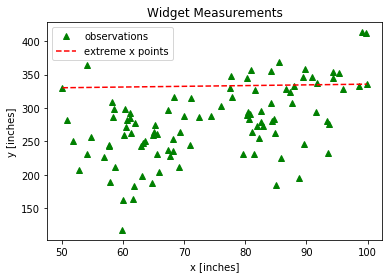

In [59]:
# Create plot:

# 1. green triangles for data points:
plt.plot(x,y, 'g^', label='observations')

# 2. red dashed line from left-most to right-most points:
plt.plot(extremex, extremey, 'r--', label='extreme x points')

# 3. Add a title:
plt.title('Widget Measurements')

# 4. Add x-axis label:
plt.xlabel('x [inches]')

# 5. Add y-axis label:
plt.ylabel('y [inches]')

# 6. Add a legend:
plt.legend();

## Problem 2 (Histogram)

In [99]:
# Establish the histogram buckets:
bins = [0, 60, 70, 80, 90, 100]

In [100]:
# Read data from .csv file:
x = []
y = []
with open('student_grades.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile , delimiter=',', quotechar= '|')
    for row in csvreader:
        # Only read rows that do NOT start with the "%" character.
        if (row[0][0] != '%'):
            x.append(float(row[0]))
            y.append(float(row[1]))

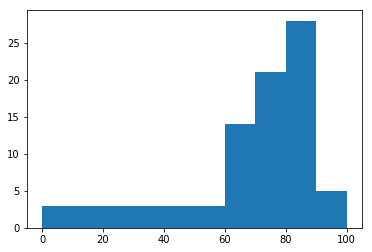

In [115]:
# Use matplot lib to count the observations in each bin:
[binCounts, b, p] = plt.hist(y, density=False, bins=bins)

# NOTE:  We only want the `binCounts` info, 
#        which plt.hist() provides for us.
#        Please ignore the blue histogram below.

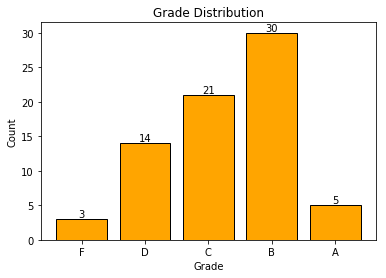

In [137]:
plt.bar(range(0, len(binCounts)), binCounts, color='orange', edgecolor='black')
plt.xticks([0, 1, 2, 3, 4], ['F', 'D', 'C', 'B', 'A'])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

# Add text labels:
for i in range(0, 5):
    plt.text(i, binCounts[i], int(binCounts[i]), ha='center', va='bottom')

## Problem 3 (Bar Plot and Box Plot in Same Figure)

In [187]:
import statistics

In [245]:
# Read data from .csv file:
data = {}
with open('solution_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile , delimiter=',', quotechar= '|')
    for row in csvreader:
        # Only read rows that do NOT start with the "%" character.
        if (row[0][0] != '%'):
            problem = int(row[0])
            solnMethod = str(row[1])
            value = float(row[2])
            
            if (solnMethod not in data):
                data[solnMethod] = {}
            data[solnMethod][problem] = value

In [246]:
gap = {}
means = []
labels = ['genetic algorithm', 'simulated annealing', 'tabu search']
blah = []
maxGap = 0
for method in labels:
    gap[method] = []
    for problem in data[method]:
        gap[method].append(100*(data['optimal'][problem] - data[method][problem]) / data['optimal'][problem])
        maxGap = max(maxGap, gap[method][-1])
    means.append(statistics.mean(gap[method]))
    blah.append(gap[method])

In [247]:
gap = []
means = []
labels = ['genetic algorithm', 'simulated annealing', 'tabu search']
maxGap = 0
i = 0
for method in labels:
    gap.append([])
    for problem in data[method]:
        gap[i].append(100*(data['optimal'][problem] - data[method][problem]) / data['optimal'][problem])
        maxGap = max(maxGap, gap[i][-1])
    means.append(statistics.mean(gap[i]))
    i += 1

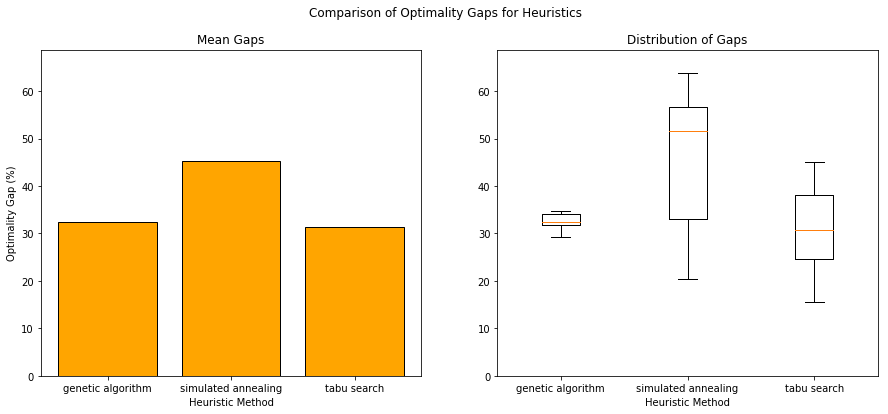

In [250]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Comparison of Optimality Gaps for Heuristics')

# barplot - mean gaps
axs[0].bar(range(0, len(means)), means, color='orange', edgecolor='black')
axs[0].set_xticks(range(0, len(labels)))
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_ylim(0, maxGap+5)

# boxplot
axs[1].boxplot(gap)
# axs[1].set_xticks(range(0, len(labels)))
axs[1].set_xticklabels(labels)
axs[1].set_title('Distribution of Gaps');
axs[1].set_xlabel('Heuristic Method')
axs[1].set_ylim(0, maxGap+5);